In [189]:
using DataFrames #for data wrangling
using StatsPlots #for plotting
using Turing #for MCMC
using CSV #CSV import
using Random #data generation (if required)
using Distributions

Import Data

In [190]:
#this is a local document, but i've also saved a slightly cleaned up version in github with the same "valveTestRaw" title
valveData = CSV.read("./Results of New Valve Tests.csv", DataFrame)

Row,Vendor,Population,Rejected,High Pop,% Over Set,% Over Limit,Set Pressure,Service
,String1,Int64,Int64,Int64,String7,String7,Int64?,String15
1,a,9,2,1,10.00%,4.30%,35,steam
2,b,13,0,0,0.00%,0.00%,missing,air
3,c,85,1,1,13.00%,9.70%,175,steam
4,d,108,21,4,4.50%,1.50%,350,air
5,e,1,0,0,0.00%,0.00%,missing,na
6,f,55,9,2,5.50%,2.50%,400,liquid
7,g,41,5,2,6.70%,3.30%,165,steam
8,h,2,0,0,0.00%,0.00%,missing,air
9,z,40,6,1,24.00%,20.00%,165,steam


Collect Number of Trials & Separate into Service Mediums

In [191]:
# vendors = (collect(valveData[:,1]))
# n=0
# for i in 1:length(vendors)
#     n = valveData[i, 2] + n
# end
# n

steamDF = []
airDF = []
liquidDF = []
airLiqDF = []

steamDF = filter(:Service => ==("steam"), valveData)
airDF = filter(:Service => ==("air"), valveData)
liquidDF = filter(:Service => ==("liquid"), valveData)
airLiqDF = filter(:Service => ==("air/liquid"), valveData)
naDF = filter(:Service => ==("na"), valveData)

n_steam = 0
n_air = 0
n_liquid = 0
n_airLiq = 0
n_na = 0

steamVend = (collect(steamDF[:,1]))
for i in 1:length(steamVend)
    n_steam = steamDF[i,2] +n_steam
end

airVend = (collect(airDF[:,1]))
for i in 1:length(airVend)
    n_air = airDF[i,2] +n_air
end

liquidVend = (collect(liquidDF[:,1]))
for i in 1:length(liquidVend)
    n_liquid = liquidDF[i,2] +n_liquid
end

airLiqVend = (collect(airLiqDF[:,1]))
for i in 1:length(airLiqVend)
    n_airLiq = airLiqDF[i,2] +n_airLiq
end

naVend = (collect(naDF[:,1]))
for i in 1:length(naVend)
    n_na = naDF[i,2]+n_na
end

steamDF

Row,Vendor,Population,Rejected,High Pop,% Over Set,% Over Limit,Set Pressure,Service
,String1,Int64,Int64,Int64,String7,String7,Int64?,String15
1,a,9,2,1,10.00%,4.30%,35,steam
2,c,85,1,1,13.00%,9.70%,175,steam
3,g,41,5,2,6.70%,3.30%,165,steam
4,z,40,6,1,24.00%,20.00%,165,steam
5,k,1,0,0,0.00%,0.00%,missing,steam
6,m,14,7,3,10.00%,3.00%,80,steam


Set Up Model

In [192]:
@model function valveTesting(Vendors, Population, highPops) # rejects serviceMedium)
    #additional functionality can be added to this, especially when considering that the probability of failing (p-1) is the sum of the probability of failing on a low pop (less dangerous) & a high pop (more dangerous)      
    
    
    #hyper prior
        μ ~ Beta(4, 2)
        σ ~ Exponential(0.1)
    
        p = Vector{Real}(undef, length(Vendors))
        n = Vector{Real}(undef, length(Vendors))
        valvePass = Vector{Real}(undef, length(Vendors))
    for i in 1:length(Vendors)
        
        #prior
        n[i] = Population[i]
        valvePass[i] ~ Normal(μ, σ)
        #distribution of valves passing given pass probability p and n trials
        #valvePass[i] ~ Binomial(n[i], p[i])
        #valvePass[i] ~ Normal(μ, σ)
    end
end

valveTesting (generic function with 2 methods)

In [193]:
steam_model = valveTesting(steamDF[:,1], steamDF[:,2], steamDF[:,3])

steam_posterior = sample(steam_model, NUTS(), 1000)

Sampling   0%|█                                         |  ETA: N/A
┌ Info: Found initial step size
│   ϵ = 0.8
└ @ Turing.Inference C:\Users\flemm\.julia\packages\Turing\oFGEb\src\mcmc\hmc.jl:213
Sampling   0%|█                                         |  ETA: 0:03:52
Sampling   1%|█                                         |  ETA: 0:01:56
Sampling   1%|█                                         |  ETA: 0:01:17
Sampling   2%|█                                         |  ETA: 0:00:59
Sampling   2%|█                                         |  ETA: 0:00:47
Sampling   3%|██                                        |  ETA: 0:00:39
Sampling   3%|██                                        |  ETA: 0:00:34
Sampling   4%|██                                        |  ETA: 0:00:29
Sampling   4%|██                                        |  ETA: 0:00:26
Sampling   5%|██                                        |  ETA: 0:00:23
Sampling   5%|███                                       |  ETA: 0:00:21
Sampling   

Chains MCMC chain (1000×20×1 Array{Float64, 3}):

Iterations        = 501:1:1500
Number of chains  = 1
Samples per chain = 1000
Wall duration     = 2.85 seconds
Compute duration  = 2.85 seconds
parameters        = μ, σ, valvePass[1], valvePass[2], valvePass[3], valvePass[4], valvePass[5], valvePass[6]
internals         = lp, n_steps, is_accept, acceptance_rate, log_density, hamiltonian_energy, hamiltonian_energy_error, max_hamiltonian_energy_error, tree_depth, numerical_error, step_size, nom_step_size

Summary Statistics
    parameters      mean       std      mcse   ess_bulk   ess_tail      rhat   ⋯
        Symbol   Float64   Float64   Float64    Float64    Float64   Float64   ⋯

             μ    0.6710    0.1750    0.0159   129.5644   309.3524    1.0118   ⋯
             σ    0.1223    0.0993    0.0115    42.2849    45.1424    1.0494   ⋯
  valvePass[1]    0.6696    0.2503    0.0181   178.9987   389.2058    1.0040   ⋯
  valvePass[2]    0.6669    0.2305    0.0209   117.2296   382.7477 

In [194]:
postDF = DataFrame(steam_posterior)



Row,iteration,chain,μ,σ,valvePass[1],valvePass[2],valvePass[3],valvePass[4],valvePass[5],valvePass[6],lp,n_steps,is_accept,acceptance_rate,log_density,hamiltonian_energy,hamiltonian_energy_error,max_hamiltonian_energy_error,tree_depth,numerical_error,step_size,nom_step_size
,Int64,Int64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64
1,501,1,0.583891,0.0626142,0.502049,0.543714,0.517923,0.582909,0.521913,0.657741,6.30593,15.0,1.0,0.512404,6.30593,-3.62095,0.142969,75.6092,3.0,0.0,0.124004,0.124004
2,502,1,0.45584,0.124261,0.493776,0.483262,0.485026,0.402757,0.60156,0.482842,3.70847,15.0,1.0,0.762825,3.70847,-1.32235,0.241111,0.442453,4.0,0.0,0.124004,0.124004
3,503,1,0.264831,0.0390047,0.359958,0.23108,0.233635,0.247646,0.342693,0.265778,3.92702,31.0,1.0,0.654236,3.92702,-0.254351,-0.446141,2.39639,5.0,0.0,0.124004,0.124004
4,504,1,0.314163,0.046037,0.265992,0.286679,0.306624,0.286424,0.253818,0.311451,7.54885,7.0,1.0,0.793773,7.54885,-2.8629,-0.27672,1.82973,2.0,0.0,0.124004,0.124004
5,505,1,0.273401,0.0432191,0.263575,0.248606,0.225048,0.253591,0.281402,0.210674,7.24213,13.0,1.0,0.703554,7.24213,-6.45762,0.095952,120.736,3.0,0.0,0.124004,0.124004
6,506,1,0.254129,0.0471624,0.250771,0.242074,0.178208,0.260982,0.340625,0.236257,5.42275,7.0,1.0,0.498509,5.42275,-2.988,-0.089331,8.42889,2.0,0.0,0.124004,0.124004
7,507,1,0.275358,0.054536,0.285547,0.321639,0.232788,0.19408,0.291711,0.242877,5.9658,7.0,1.0,0.54886,5.9658,-1.5672,0.140143,1.45903,3.0,0.0,0.124004,0.124004
8,508,1,0.44572,0.046288,0.475307,0.494203,0.428608,0.400717,0.476232,0.415604,8.55106,43.0,1.0,0.496393,8.55106,-4.08968,-0.381792,2.75735,5.0,0.0,0.124004,0.124004
9,509,1,0.365867,0.120112,0.3479,0.367396,0.378692,0.532808,0.363092,0.321446,3.19579,15.0,1.0,0.143619,3.19579,1.71901,1.72501,3.99648,3.0,0.0,0.124004,0.124004


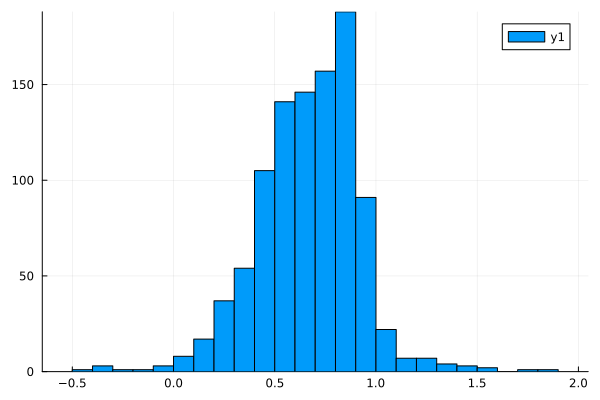

In [195]:
histogram(postDF[:, 5])

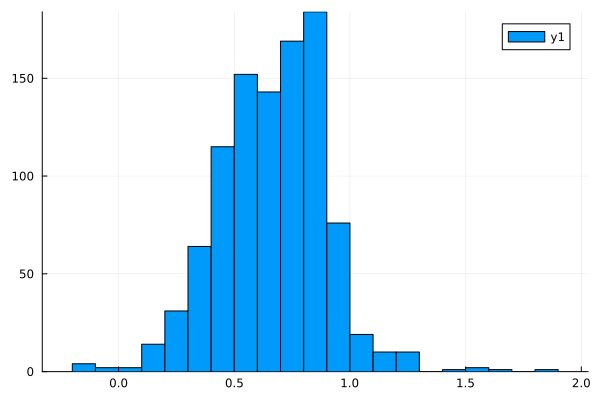

In [196]:
histogram(postDF[:, 6])